We let u= 3x^{3}+2\sin(y), then f = - \nabla u = -9x^{2}-2\cos(y)

error_L2  = 0.04001474709182551
error_max = 0.07355745233848787
error_H1 = 0.19160820644758234
h = 0.1767766952966369
H_2-norm of u :  1.4142135623730951
error_L2  = 0.0412605569766943
error_max = 0.07604919497581131
error_H1 = 0.19563771319767762
h = 0.08838834764831845
H_2-norm of u :  1.4142135623730951
error_L2  = 0.041496173881060895
error_max = 0.07609484755900997
error_H1 = 0.19640108174105939
h = 0.058925565098879064
H_2-norm of u :  1.4142135623731096
error_L2  = 0.04157901293853808
error_max = 0.07622901511687852
error_H1 = 0.1966698767173894
h = 0.04419417382415922
H_2-norm of u :  1.4142135623730951
error_L2  = 0.04161742158543129
error_max = 0.07625828417502256
error_H1 = 0.19679461216950503
h = 0.03535533905932741
H_2-norm of u :  1.4142135623731442


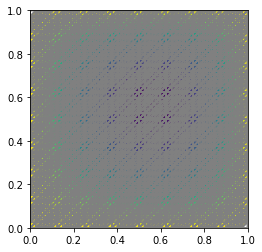

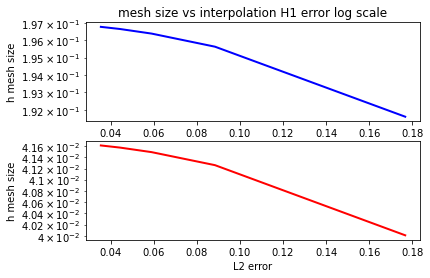

In [27]:
from __future__ import print_function
from fenics import *
import matplotlib.pyplot as plt

err_L2_list=[]
err_H1_list=[]
h_list=[]
H2_norm_list=[]

for i in range (5):
    # Create mesh and define function space
    k= 8*(i+1)
    mesh = UnitSquareMesh(k, k)
    V = FunctionSpace(mesh, 'CG', 1)

    # Define boundary condition
    #u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
    u_D=Constant(2.0)

    def boundary(x, on_boundary):
        return on_boundary

    bc = DirichletBC(V, u_D, boundary)

    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    #f = Constant(-6.0)
    f=Expression('-x[0] -x[1]', degree=2)
    a = dot(grad(u), grad(v))*dx
    L = f*v*dx

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    # Plot solution and mesh
    plot(u)
    plot(mesh)

    # Save solution to file in VTK format
    vtkfile = File('poisson/solution.pvd')
    vtkfile << u

    # Compute error in L2 norm
    error_L2 = errornorm(u_D, u, 'L2')
    err_L2_list.append(error_L2)
    error_H1 = errornorm(u_D, u, 'H1')
    err_H1_list.append(error_H1)
    h_list.append(mesh.hmax())
    x = SpatialCoordinate(mesh)
    f = x[0]*x[1]
    ggf = grad(grad(f))
    H2_seminorm_of_f = sqrt(assemble(inner(ggf,ggf)*dx))
    H2_norm_list.append(H2_seminorm_of_f)

    # Compute maximum error at vertices
    vertex_values_u_D = u_D.compute_vertex_values(mesh)
    vertex_values_u = u.compute_vertex_values(mesh)
    import numpy as np
    error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
    
    # Hold plot
    plt.show#interactive()#print ("did I plot tho?")#print (err_L2_list, err_H1_list, h_list, H2_norm_list)
    
    # Print errors
    print('error_L2  =', error_L2)
    print('error_max =', error_max)
    print('error_H1 =', error_H1)
    print ('h =', mesh.hmax())
    print("H_2-norm of u : ", H2_seminorm_of_f)

import pylab
import matplotlib.pyplot as plt
#a = [[h_list[0], err_H1_list[0]],
     #[h_list[1], err_H1_list[1]],
     #[h_list[2], err_H1_list[2]]]
fig = plt.figure()
#ax = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


line, = ax1.plot(h_list, err_H1_list , color='blue', lw=2)
line, = ax2.plot(h_list, err_L2_list , color='red', lw=2)

ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.set_title(r'mesh size vs interpolation H1 error log scale')
ax1.set_xlabel('H_1 error')
ax1.set_ylabel('h mesh size')
ax2.set_xlabel('L2 error')
ax2.set_ylabel('h mesh size')

pylab.show()


We know that the H_1 interpolation error is bounded from above by h*H_2(u), the H_2 norm of u.
Here for example with an 8*8 mesh we have h=0.176 and H_2(u)=1.41, so the upper bound is 0.24. The H_1  error is 0.191 so this result is consistent with theory indeed.
If we compare both graph we notice that the L2 norm has a smaller rate of convergence, however since the L2 error is much smaller than the H1 error to begin with it realistically can't converge much faster.

In [29]:
#mesh = Mesh("mesh.xml")

err_L2_list=[]
err_H1_list=[]
h_list=[]
H2_norm_list=[]

for i in range (5):
    # Create mesh and define function space
    k= 8*(i+1)
    mesh = Mesh("ell_mesh.xml")
    V = FunctionSpace(mesh, 'CG', 1)

    # Define boundary condition
    #u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
    u_D=Constant(2.0)

    def boundary(x, on_boundary):
        return on_boundary

    bc = DirichletBC(V, u_D, boundary)

    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    #f = Constant(-6.0)
    f=Expression('-x[0] -x[1]', degree=2)
    a = dot(grad(u), grad(v))*dx
    L = f*v*dx

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    # Plot solution and mesh
    plot(u)
    plot(mesh)

    # Save solution to file in VTK format
    vtkfile = File('poisson/solution.pvd')
    vtkfile << u

    # Compute error in L2 norm
    error_L2 = errornorm(u_D, u, 'L2')
    err_L2_list.append(error_L2)
    error_H1 = errornorm(u_D, u, 'H1')
    err_H1_list.append(error_H1)
    h_list.append(mesh.hmax())
    x = SpatialCoordinate(mesh)
    f = x[0]*x[1]
    ggf = grad(grad(f))
    H2_seminorm_of_f = sqrt(assemble(inner(ggf,ggf)*dx))
    H2_norm_list.append(H2_seminorm_of_f)

    # Compute maximum error at vertices
    vertex_values_u_D = u_D.compute_vertex_values(mesh)
    vertex_values_u = u.compute_vertex_values(mesh)
    import numpy as np
    error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
    
    # Hold plot
    plt.show#interactive()#print ("did I plot tho?")#print (err_L2_list, err_H1_list, h_list, H2_norm_list)
    
    # Print errors
    print('error_L2  =', error_L2)
    print('error_max =', error_max)
    print('error_H1 =', error_H1)
    print ('h =', mesh.hmax())
    print("H_2-norm of u : ", H2_seminorm_of_f)

import pylab
import matplotlib.pyplot as plt
#a = [[h_list[0], err_H1_list[0]],
     #[h_list[1], err_H1_list[1]],
     #[h_list[2], err_H1_list[2]]]
fig = plt.figure()
#ax = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


line, = ax1.plot(h_list, err_H1_list , color='blue', lw=2)
line, = ax2.plot(h_list, err_L2_list , color='red', lw=2)

ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.set_title(r'mesh size vs interpolation H1 error log scale')
ax1.set_xlabel('H_1 error')
ax1.set_ylabel('h mesh size')
ax2.set_xlabel('L2 error')
ax2.set_ylabel('h mesh size')

pylab.show()

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to read data from XML file.
*** Reason:  Unable to open file "ell_mesh.xml".
*** Where:   This error was encountered inside XMLFile.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------
